In [160]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sys,os
from glob import glob
import re
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
sns.set_style("ticks")

In [2]:
parentdir='C:\\Users\\hsiehm\\Documents\\SBIA\\Breasts\\tomo_texture_phantom'
csvs=glob(os.path.join(parentdir,'2017*_subset_*_mm', 'w*d*', 'sheet', 'TextureFeature_mean.csv'))
#csvs.append(os.path.join(parentdir, 'sheet', 'TextureFeature_mean.csv'))

In [3]:
csvs

['C:\\Users\\hsiehm\\Documents\\SBIA\\Breasts\\tomo_texture_phantom\\20170624_subset_cview_mm\\w10d10\\sheet\\TextureFeature_mean.csv',
 'C:\\Users\\hsiehm\\Documents\\SBIA\\Breasts\\tomo_texture_phantom\\20170624_subset_cview_mm\\w12.7d12.7\\sheet\\TextureFeature_mean.csv',
 'C:\\Users\\hsiehm\\Documents\\SBIA\\Breasts\\tomo_texture_phantom\\20170624_subset_cview_mm\\w18d18\\sheet\\TextureFeature_mean.csv',
 'C:\\Users\\hsiehm\\Documents\\SBIA\\Breasts\\tomo_texture_phantom\\20170624_subset_cview_mm\\w25.5d25.5\\sheet\\TextureFeature_mean.csv',
 'C:\\Users\\hsiehm\\Documents\\SBIA\\Breasts\\tomo_texture_phantom\\20170624_subset_cview_mm\\w6.3d3\\sheet\\TextureFeature_mean.csv',
 'C:\\Users\\hsiehm\\Documents\\SBIA\\Breasts\\tomo_texture_phantom\\20170624_subset_cview_mm\\w6.3d4\\sheet\\TextureFeature_mean.csv',
 'C:\\Users\\hsiehm\\Documents\\SBIA\\Breasts\\tomo_texture_phantom\\20170624_subset_cview_mm\\w6.3d5\\sheet\\TextureFeature_mean.csv',
 'C:\\Users\\hsiehm\\Documents\\SBIA\\Br

In [4]:
len(csvs)

52

In [5]:
csvs_cview=csvs[:8]
csvs_proc_pr=csvs[8:16]
csvs_raw_pr=csvs[16:24]
csvs_recon=csvs[24:32]
#csvs_proc_mg_silver=csvs[32:37]
#csvs_raw_mg_silver=csvs[37:42]
#csvs_proc_mg=csvs[42:47]
#csvs_raw_mg=csvs[47:]

In [6]:
csvs_cview, csvs_proc_pr, csvs_raw_pr, csvs_recon

(['C:\\Users\\hsiehm\\Documents\\SBIA\\Breasts\\tomo_texture_phantom\\20170624_subset_cview_mm\\w10d10\\sheet\\TextureFeature_mean.csv',
  'C:\\Users\\hsiehm\\Documents\\SBIA\\Breasts\\tomo_texture_phantom\\20170624_subset_cview_mm\\w12.7d12.7\\sheet\\TextureFeature_mean.csv',
  'C:\\Users\\hsiehm\\Documents\\SBIA\\Breasts\\tomo_texture_phantom\\20170624_subset_cview_mm\\w18d18\\sheet\\TextureFeature_mean.csv',
  'C:\\Users\\hsiehm\\Documents\\SBIA\\Breasts\\tomo_texture_phantom\\20170624_subset_cview_mm\\w25.5d25.5\\sheet\\TextureFeature_mean.csv',
  'C:\\Users\\hsiehm\\Documents\\SBIA\\Breasts\\tomo_texture_phantom\\20170624_subset_cview_mm\\w6.3d3\\sheet\\TextureFeature_mean.csv',
  'C:\\Users\\hsiehm\\Documents\\SBIA\\Breasts\\tomo_texture_phantom\\20170624_subset_cview_mm\\w6.3d4\\sheet\\TextureFeature_mean.csv',
  'C:\\Users\\hsiehm\\Documents\\SBIA\\Breasts\\tomo_texture_phantom\\20170624_subset_cview_mm\\w6.3d5\\sheet\\TextureFeature_mean.csv',
  'C:\\Users\\hsiehm\\Documents\\

In [207]:
dfs_merged=[]
for c in [csvs_recon, csvs_cview, csvs_proc_pr, csvs_raw_pr]:
    dfs=[]
    for i, f in enumerate(c):
        exp = f.split('\\')[8]
        d = exp.find('d')
        win = float(exp[1:d])
        sd = float(exp[d+1:])

        df=pd.read_csv(f, index_col=0)
        old_cols=df.columns
        new_cols = []
        for i in df.columns:
            if 'Edge' in i or 'LBP' in i:
                new_cols.append('%s' % i.split('_')[0])
            else:
                new_cols.append('%s %s' % (i.split('_')[0], i.split('_')[-1]))
        df.columns=new_cols
        kvp=[int(i.split('_')[0]) for i in df.index]
        mas=[int(i.split('_')[2]) for i in df.index]
        df['kVp']=kvp
        df['mAs']=mas
        df['AutoTimed']=True
        df['Exp']='w=d=%s mm' % win
        df['WindowSize']=win
        df['SlidingDistance']=sd
        if win == sd:
            df['Overlap']=False
        else:
            df['Overlap']=True
        non_autotimed_ind=df[(df['kVp']==31) & (df['mAs']!=42)].index
        df.loc[non_autotimed_ind, 'AutoTimed']=False
        dfs.append(df)

    df_merged=pd.concat(dfs)
    df_merged.sort_values(by=['WindowSize', 'SlidingDistance'], 
                          ascending=True, inplace=True)
    dfs_merged.append(df_merged)
    
df_recon_merged, df_cview_merged, df_proc_pr_merged, \
df_raw_pr_merged = dfs_merged

In [24]:
ref_cview='human_studies_cview_texture_mean_dcm_header_merged.csv'
ref_tomo='human_studies_tomo_texture_mean_dcm_header_merged.csv'
ref_mammo='human_studies_mammo_texture_mean_dcm_header_merged.csv'

In [451]:
dfs_ref=[pd.read_csv(f, index_col=0) 
         for f in [ref_cview, ref_tomo, ref_mammo]]

dfs_ref=[]
for f in [ref_cview, ref_tomo, ref_mammo]:
    df=pd.read_csv(f, index_col=0)
    new_cols=[i.replace('_', ' ') for i in df.columns]
    df.columns=new_cols
    dfs_ref.append(df)

df_ref_cview_merged,df_ref_tomo_merged, df_ref_mammo_merged=dfs_ref

In [164]:
df_recon_merged.head()

,EdgeEnhance,FD center,LBP,cooccurrence clusterShade,cooccurrence correlation,cooccurrence energy,cooccurrence entropy,cooccurrence haralickCorrelation,cooccurrence inertia,cooccurrence inverseDifferenceMoment,...,runlength RunPercentage,runlength ShortRunEmphasis,kVp,mAs,Auto-timed,Exp,WindowSize,SlidingDistance,Overlap,mAs_log
Case,,,,,,,,,,,,,,,,,,,,,
27_kVp_113_mAs_2,0.000019,1.896263,4.766509,9991.443,0.001718,0.000982,9.261712,14201650.0,324.6962,0.099700,...,0.937297,0.999934,27,113,True,w=d=6.3 mm,6.3,3.0,True,6.820179
29_kVp_66_mAs_1,0.000019,1.919793,4.812500,9629.648,0.001668,0.000937,9.286503,14373700.0,324.5404,0.097652,...,0.941822,0.999947,29,66,True,w=d=6.3 mm,6.3,3.0,True,6.044394
31_kVp_15_mAs_1,0.000018,2.015663,4.944510,6504.317,0.001334,0.000744,9.440577,15550790.0,322.3175,0.084499,...,0.960591,0.999992,31,15,False,w=d=6.3 mm,6.3,3.0,True,3.906891
31_kVp_84_mAs_2,0.000020,1.865653,4.768595,11081.580,0.001727,0.001052,9.205619,13916250.0,334.2539,0.102368,...,0.930392,0.999901,31,84,False,w=d=6.3 mm,6.3,3.0,True,6.392317
30_kVp_51_mAs_1,0.000019,1.942329,4.815821,9405.855,0.001632,0.000911,9.302237,14647120.0,324.9729,0.095840,...,0.944680,0.999963,30,51,True,w=d=6.3 mm,6.3,3.0,True,5.672425


In [443]:
df_ref_mammo_merged.head()

,Case Case,EdgeEnhance,FD center,LBP,cooccurrence clusterShade,cooccurrence correlation,cooccurrence energy,cooccurrence entropy,cooccurrence haralickCorrelation,cooccurrence inertia,...,type,AccessionNumber,BodyPartThickness,ImageLaterality,ImagesinAcquisition,SeriesDescription,ViewPosition,BodyPartThicknessStrata,Modality,FilePrefix.1
FilePrefix,,,,,,,,,,,,,,,,,,,,,
3076353_L_CC_1,3076353_L_CC_1,0.000004,1.962124,10.333330,8393.640,0.001468,0.000826,9.601574,15529770.0,299.2147,...,DM,3076353,59,L,1,L CC,CC,"(55.0, 65.0]",DM,3076353_L_CC_1
3066999_R_XCCL_1,3066999_R_XCCL_1,0.000006,1.962356,9.723164,7552.337,0.000840,0.000559,9.818875,14953250.0,353.4228,...,DM,3066999,39,R,1,R XCCL,XCCL,"(35.0, 45.0]",DM,3066999_R_XCCL_1
3066999_L_CC_1,3066999_L_CC_1,0.000006,2.052536,10.352560,7075.937,0.000912,0.000508,9.876153,14982020.0,351.9575,...,DM,3066999,37,L,1,L CC,CC,"(35.0, 45.0]",DM,3066999_L_CC_1
4067075_L_CC_1,4067075_L_CC_1,0.000004,1.972319,9.502024,7470.594,0.001357,0.000835,9.693142,14734800.0,287.7987,...,DM,4067075,56,L,1,L CC,CC,"(55.0, 65.0]",DM,4067075_L_CC_1
3076564_L_CC_1,3076564_L_CC_1,0.000004,1.980424,10.564460,6891.622,0.001634,0.001095,9.521229,15476180.0,278.7242,...,DM,3076564,49,L,1,L CC,CC,"(45.0, 55.0]",DM,3076564_L_CC_1


In [445]:
df_ref_cview_merged.head()

,Case Case,Exclude Exclude,Notes Notes,EdgeEnhance,FD center,LBP,cooccurrence clusterShade,cooccurrence correlation,cooccurrence energy,cooccurrence entropy,...,type,AccessionNumber,BodyPartThickness,ImageLaterality,ImagesinAcquisition,SeriesDescription,ViewPosition,BodyPartThicknessStrata,Modality,FilePrefix.1
FilePrefix,,,,,,,,,,,,,,,,,,,,,
76914020_L_MLO_1,76914020_L_MLO_1,True,paddle,0.000013,1.877105,4.571942,8053.533,0.001110,0.000658,9.705690,...,C-View,76914020,46,L,1,L MLO C-View,MLO,"(45.0, 55.0]",C-View,76914020_L_MLO_1
76778095_R_MLO_1,76778095_R_MLO_1,True,paddle,0.000085,1.797847,3.136986,54471.920,0.001365,0.092919,7.977268,...,C-View,76778095,34,R,1,R MLO C-View,MLO,"(6.0, 35.0]",C-View,76778095_R_MLO_1
76757852_L_MLO_1,76757852_L_MLO_1,True,paddle,0.000009,1.940698,4.059211,5240.129,0.001404,0.086725,8.821979,...,C-View,76757852,32,L,1,L MLO C-View,MLO,"(6.0, 35.0]",C-View,76757852_L_MLO_1
76631639_L_MLO_1,76631639_L_MLO_1,True,Implant and bad mask,0.000004,2.019889,4.803922,-2053.952,0.004271,0.003858,8.829736,...,C-View,76631639,58,L,1,L MLO C-View,MLO,"(55.0, 65.0]",C-View,76631639_L_MLO_1
76809344_R_MLO_1,76809344_R_MLO_1,True,Implant,0.000008,1.803990,5.482759,5331.397,0.001599,0.001377,9.356874,...,C-View,76809344,58,R,1,R MLO C-View,MLO,"(55.0, 65.0]",C-View,76809344_R_MLO_1


In [444]:
df_ref_tomo_merged.head()

,Case Case,EdgeEnhance,FD center,LBP,cooccurrence clusterShade,cooccurrence correlation,cooccurrence energy,cooccurrence entropy,cooccurrence haralickCorrelation,cooccurrence inertia,...,AccessionNumber,BodyPartThickness,ImageLaterality,ImagesinAcquisition,SeriesDescription,ViewPosition,BodyPartThicknessStrata,Modality,FilePrefix.1,CentralSliceNumber
FilePrefix,,,,,,,,,,,,,,,,,,,,,
3066999_RCC_PR_image7,3066999_RCC_PR_image7,0.000045,1.898054,4.449664,5085.442,0.001264,0.000611,10.320910,15242460.0,314.5515,...,3066999,37,NaN,15,R CC Tomosynthesis Projection,CC,"(35, 45]",Tomosynthesis Projection,3066999_RCC_PR_image7,7
3066999_LCC_PR_image7,3066999_LCC_PR_image7,0.000016,1.919002,5.032432,3310.239,0.001113,0.000592,10.363560,16695900.0,314.2090,...,3066999,37,NaN,15,L CC Tomosynthesis Projection,CC,"(35, 45]",Tomosynthesis Projection,3066999_LCC_PR_image7,7
3066999_RCC_RC_image20,3066999_RCC_RC_image20,0.000020,1.844085,4.271318,11629.020,0.001132,0.000544,9.474393,14653490.0,379.3118,...,3066999,37,NaN,42,R CC Tomosynthesis Reconstruction,CC,"(35, 45]",Tomosynthesis Reconstruction,3066999_RCC_RC_image20,20
3076353_LCC_PR_image7,3076353_LCC_PR_image7,0.000010,1.837034,4.771028,2767.396,0.001470,0.000696,10.288310,15152950.0,257.7211,...,3076353,59,NaN,15,L CC Tomosynthesis Projection,CC,"(55, 65]",Tomosynthesis Projection,3076353_LCC_PR_image7,7
3066999_LCC_RC_image20,3066999_LCC_RC_image20,0.000015,1.866561,5.007576,9753.167,0.001185,0.000575,9.502683,15281240.0,357.6535,...,3066999,37,NaN,42,L CC Tomosynthesis Reconstruction,CC,"(35, 45]",Tomosynthesis Reconstruction,3066999_LCC_RC_image20,20


In [452]:
df_ref_merged=pd.concat([df_ref_mammo_merged, df_ref_tomo_merged, df_ref_cview_merged])

In [453]:
df_ref_tomo_merged['BodyPartThicknessStrata'].unique()

array(['(35, 45]', '(55, 65]', '(45, 55]', '(65, 75]', '(6, 35]',
       '(75, 85]', '(85, 133]'], dtype=object)

In [454]:
strata_order=['(6, 35]', '(35, 45]', '(45, 55]',
              '(55, 65]', '(65, 75]','(75, 85]', 
              '(85, 133]']

In [87]:
np.log2(np.unique(df_recon_merged[condition2]['mAs'].values))

array([ 3.169925  ,  3.9068906 ,  4.39231742,  4.9068906 ,  5.39231742,
        5.9068906 ,  6.39231742,  6.9068906 ])

In [90]:
df_recon_merged['mAs_log']=df_recon_merged['mAs'].apply(np.log2)

In [165]:
df_ref_tomo_merged.Modality.unique()

array(['Tomosynthesis Projection', 'Tomosynthesis Reconstruction'], dtype=object)

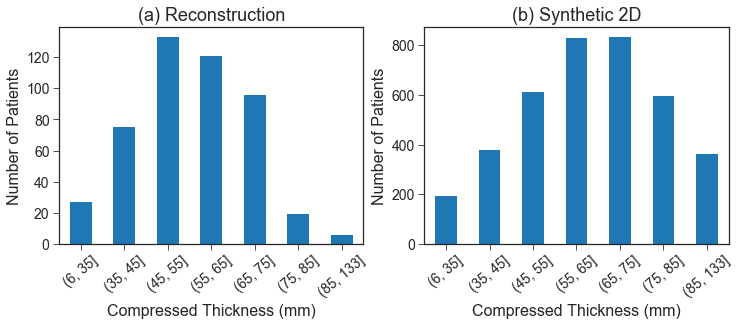

In [463]:
f, ax=plt.subplots(1,2, figsize=(12,4))
#f.suptitle('Number of Patients by thickness stratum', fontsize=22, y=1.05)

condition='Modality == "Tomosynthesis Reconstruction"'
df_ref_tomo_merged.query(condition).drop_duplicates(subset=['AccessionNumber'])\
    ['BodyPartThicknessStrata'].value_counts().loc[strata_order].plot.bar(rot=40, ax=ax[0])

ax[0].set_title('(a) Reconstruction', fontsize=18)
ax[0].tick_params(axis='y', which='major', labelsize=14)
ax[0].tick_params(axis='x', which='major', labelsize=14)
ax[0].set_xlabel('Compressed Thickness (mm)', fontsize=16)
ax[0].set_ylabel('Number of Patients', fontsize=16)

df_ref_cview_merged.drop_duplicates(subset=['AccessionNumber'])\
    ['BodyPartThicknessStrata'].value_counts().loc[strata_order].plot.bar(rot=40, ax=ax[1])
ax[1].set_title('(b) Synthetic 2D', fontsize=18)
ax[1].tick_params(axis='y', which='major', labelsize=14)
ax[1].tick_params(axis='x', which='major', labelsize=14)
ax[1].set_xlabel('Compressed Thickness (mm)', fontsize=16)
ax[1].set_ylabel('Number of Patients', fontsize=16)

f.savefig('figures_combined_20180227/patient_by_thickness.png', bbox_inches='tight')

In [306]:
feature_cols

Index([u'EdgeEnhance', u'FD center', u'LBP', u'cooccurrence clusterShade',
       u'cooccurrence correlation', u'cooccurrence energy',
       u'cooccurrence entropy', u'cooccurrence haralickCorrelation',
       u'cooccurrence inertia', u'cooccurrence inverseDifferenceMoment',
       u'graylevel 5th', u'graylevel 5thmean', u'graylevel 95th',
       u'graylevel 95thmean', u'graylevel entropy', u'graylevel kurtosis',
       u'graylevel max', u'graylevel mean', u'graylevel min',
       u'graylevel sigma', u'graylevel skewness', u'graylevel sum',
       u'runlength GreyLevelNonuniformity',
       u'runlength HighGreyLevelRunEmphasis', u'runlength LongRunEmphasis',
       u'runlength LowGreyLevelRunEmphasis',
       u'runlength RunLengthNonuniformity', u'runlength RunPercentage',
       u'runlength ShortRunEmphasis'],
      dtype='object')

Text(0.5,0.98,u'Reconstruction')

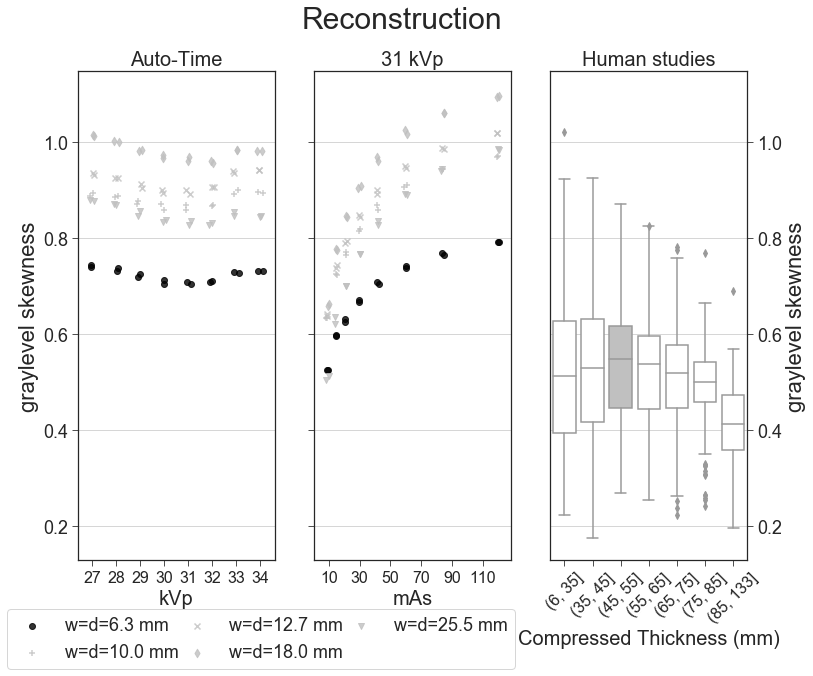

In [468]:
figdir = 'figures_combined_20180227'
if not os.path.isdir(figdir):
    os.makedirs(figdir)
feature = 'graylevel skewness'
f, ax = plt.subplots(1,3, sharey=True, figsize=(12, 9))

if feature == 'EdgeEnhance':
    ax[0].set_ylim(-1e-5, 6e-5)
elif feature == 'runlength_ShortRunEmphasis':
    ax[0].set_ylim(0.9992, 1.0002)
elif feature == 'runlength_LongRunEmphasis':
    ax[0].set_ylim(0.998, 1.015)
    
markers=['o', '+', 'x', 'd', 'v'] 
colors=['b','b','b','b','b']
## stripplot does not take markers argument. See https://github.com/mwaskom/seaborn/issues/1210

## RECON
for i, exp in enumerate(df_recon_merged.Exp.unique()):
    c='silver'
    if exp == 'w=d=6.3 mm':
        c='black'
    condition1 = (df_recon_merged['AutoTimed'] == True) & \
                 (df_recon_merged['Overlap'] == False) & \
                 (df_recon_merged['Exp']== exp)
    sns.regplot(x = 'kVp', y = feature, ax=ax[0], label=exp,
                data = df_recon_merged[condition1],
                x_jitter=0.12, fit_reg=False, color=c, marker=markers[i])

    condition2 = (df_recon_merged['kVp'] == 31) & \
                 (df_recon_merged['Overlap'] == False) & \
                 (df_recon_merged['Exp'] == exp)
    sns.regplot(x = 'mAs', y = feature, ax=ax[1], label=exp,
                data = df_recon_merged[condition2],
                x_jitter=1, fit_reg=False, color=c, marker=markers[i])

ax[0].set_xticks(range(27,35))
ax[0].set_xticklabels(range(27,35))
ax[1].set_xticks(np.arange(10, 120, 20, dtype=int))
ax[1].set_xticklabels(np.arange(10, 120, 20, dtype=int))
    
# Changing data x position with positions=positions in stripplot is "not possible": https://github.com/mwaskom/seaborn/issues/1074
ax[0].set_title('Auto-Time', fontsize=20)
ax[1].set_title('31 kVp', fontsize=20)
ax[0].set_xlabel('kVp', fontsize=18)
ax[1].set_xlabel('mAs', fontsize=18)

## Human studies
condition_human=(df_ref_tomo_merged['type']=='RC')
sns.boxplot(x = 'BodyPartThicknessStrata', y = feature, color='w',
            order=strata_order, data = df_ref_tomo_merged[condition_human], 
            ax=ax[-1])
ax[-1].set_xticklabels(ax[-1].get_xticklabels(), rotation=45)
ax[-1].set_title('Human studies', fontsize=20)
ax[-1].set_xlabel('Compressed Thickness (mm)', fontsize=20)
patch=ax[-1].artists[2]
patch.set_facecolor('silver')

for i in range(len(ax)):
    ax[i].yaxis.grid(which='major')
    ax[i].xaxis.label.set_size(20)
    ax[i].tick_params(labelsize=16)
    ax[i].yaxis.label.set_size(22)
    if i==1:
        ax[i].yaxis.label.set_visible(False)
    #if i>0 and i<len(ax)-1:
    #    ax[i].legend_.remove()
ax[0].legend(loc=8, ncol=3, bbox_to_anchor=(0.93, -0.24), columnspacing = 0.01, 
             frameon = True, fancybox = True, fontsize=18)

ax[-1].yaxis.tick_right()
ax[-1].yaxis.set_label_position("right")
ax[0].tick_params(axis='y', which='major', labelsize=18)
ax[-1].tick_params(axis='y', which='major', labelsize=18)

f.suptitle('Reconstruction', fontsize=30)

In [53]:
df_cview_merged.columns[:-7]

Index([u'EdgeEnhance', u'FD_center', u'LBP', u'cooccurrence_clusterShade',
       u'cooccurrence_correlation', u'cooccurrence_energy',
       u'cooccurrence_entropy', u'cooccurrence_haralickCorrelation',
       u'cooccurrence_inertia', u'cooccurrence_inverseDifferenceMoment',
       u'graylevel_5th', u'graylevel_5thmean', u'graylevel_95th',
       u'graylevel_95thmean', u'graylevel_entropy', u'graylevel_kurtosis',
       u'graylevel_max', u'graylevel_mean', u'graylevel_min',
       u'graylevel_sigma', u'graylevel_skewness', u'graylevel_sum',
       u'runlength_GreyLevelNonuniformity',
       u'runlength_HighGreyLevelRunEmphasis', u'runlength_LongRunEmphasis',
       u'runlength_LowGreyLevelRunEmphasis',
       u'runlength_RunLengthNonuniformity', u'runlength_RunPercentage',
       u'runlength_ShortRunEmphasis'],
      dtype='object')

In [469]:
figdir = os.path.join('figures_combined_20180227', 'RC')
if not os.path.isdir(figdir):
    os.makedirs(figdir)
    
markers=['o', '+', 'x', 'd', 'v'] 
colors=['b','b','b','b','b']
    
for feature in df_recon_merged.columns[:-7]:
    f, ax = plt.subplots(1,3, sharey=True, figsize=(16,9))

    ## RECON
    for i, exp in enumerate(df_recon_merged.Exp.unique()):
        c='dimgray'
        if exp == 'w=d=6.3 mm':
            c='black'
        condition1 = (df_recon_merged['AutoTimed'] == True) & \
                     (df_recon_merged['Overlap'] == False) & \
                     (df_recon_merged['Exp']== exp)
        sns.regplot(x = 'kVp', y = feature, ax=ax[0], label=exp,
                    data = df_recon_merged[condition1],
                    x_jitter=0.12, fit_reg=False, color=c, marker=markers[i])

        condition2 = (df_recon_merged['kVp'] == 31) & \
                     (df_recon_merged['Overlap'] == False) & \
                     (df_recon_merged['Exp'] == exp)
        sns.regplot(x = 'mAs', y = feature, ax=ax[1], label=exp,
                    data = df_recon_merged[condition2],
                    x_jitter=1, fit_reg=False, color=c, marker=markers[i])

    ax[0].set_xticks(range(27,35))
    ax[0].set_xticklabels(range(27,35))
    ax[1].set_xticks(np.arange(10, 120, 20, dtype=int))
    ax[1].set_xticklabels(np.arange(10, 120, 20, dtype=int))

    ax[0].set_title('(a) Auto-Time', fontsize=20)
    ax[1].set_title('(b) 31 kVp', fontsize=20)
    ax[0].set_xlabel('kVp', fontsize=18)
    ax[1].set_xlabel('mAs', fontsize=18)

    ## Human studies
    condition_human=(df_ref_tomo_merged['type']=='RC')
    sns.boxplot(x = 'BodyPartThicknessStrata', y = feature, color='w',
                order=strata_order, data = df_ref_tomo_merged[condition_human], 
                ax=ax[-1])
    ax[-1].set_xticklabels(ax[-1].get_xticklabels(), rotation=45)
    ax[-1].set_xlabel('Compressed Thickness (mm)', fontsize=20)
    patch=ax[-1].artists[2]
    patch.set_facecolor('silver')

    for i in range(len(ax)):
        ax[i].yaxis.grid(which='major')
        ax[i].xaxis.label.set_size(20)
        ax[i].tick_params(labelsize=16)
        ax[i].yaxis.label.set_size(22)
        if i==1:
            ax[i].yaxis.label.set_visible(False)
    ax[0].legend(loc=8, ncol=3, bbox_to_anchor=(1.08, -0.25), columnspacing = 0.01, 
                 frameon = True, fancybox = True, fontsize=20)

    ax[-1].yaxis.tick_right()
    ax[-1].yaxis.set_label_position("right")
    ax[0].tick_params(axis='y', which='major', labelsize=18)
    ax[-1].tick_params(axis='y', which='major', labelsize=18)

    f.suptitle('Reconstruction', fontsize=30)
        
    note = '*'
    if feature == 'EdgeEnhance':
        ax[0].set_ylim(-1e-5, 4e-5)
    elif feature == 'runlength ShortRunEmphasis':
        ax[0].set_ylim(1-3e-4, 1+8e-5)
    elif feature == 'runlength LongRunEmphasis':
        ax[0].set_ylim(0.9995, 1.0015)
    elif feature == 'runlength LowGreyLevelRunEmphasis':
        ax[0].set_ylim(0, 5e-3)
    elif feature == 'runlength HighGreyLevelRunEmphasis':
        ax[0].set_ylim(2000, 4000)
    elif feature == 'cooccurrence correlation':
        ax[0].set_ylim(0, 5e-3)
    elif feature == 'cooccurrence energy':
        ax[0].set_ylim(0, 2e-3)
    elif feature == 'graylevel 95thmean':
        ax[0].set_ylim(0.4, 2)
    elif feature == 'graylevel 95th':
        ax[0].set_ylim(0.25, 1.6)
    elif feature == 'graylevel mean':
        ax[0].set_ylim(-0.25, 0.2)
    elif feature == 'graylevel sum':
        ax[0].set_ylim(-1000, 1550)
        
    else:
        note = ''
    ax[-1].set_title('(c) Human studies' + note, fontsize=22)
    
    f.savefig(os.path.join(figdir, 'RC_Textures_Mean_%s_All.png' % feature), dpi=150, bbox_inches='tight')
    plt.close('all')

In [470]:
figdir = os.path.join('figures_combined_20180227', 'CView')
if not os.path.isdir(figdir):
    os.makedirs(figdir)
    
markers=['o', '+', 'x', 'd', 'v'] 
colors=['b','b','b','b','b']
    
for feature in df_cview_merged.columns[:-7]:
    f, ax = plt.subplots(1,3, sharey=True, figsize=(16,9))

    ## RECON
    for i, exp in enumerate(df_cview_merged.Exp.unique()):
        c='dimgray'
        if exp == 'w=d=6.3 mm':
            c='black'
        condition1 = (df_cview_merged['AutoTimed'] == True) & \
                     (df_cview_merged['Overlap'] == False) & \
                     (df_cview_merged['Exp']== exp)
        sns.regplot(x = 'kVp', y = feature, ax=ax[0], label=exp,
                    data = df_cview_merged[condition1],
                    x_jitter=0.12, fit_reg=False, color=c, marker=markers[i])

        condition2 = (df_cview_merged['kVp'] == 31) & \
                     (df_cview_merged['Overlap'] == False) & \
                     (df_cview_merged['Exp'] == exp)
        sns.regplot(x = 'mAs', y = feature, ax=ax[1], label=exp,
                    data = df_cview_merged[condition2],
                    x_jitter=1, fit_reg=False, color=c, marker=markers[i])

    ax[0].set_xticks(range(27,35))
    ax[0].set_xticklabels(range(27,35))
    ax[1].set_xticks(np.arange(10, 120, 20, dtype=int))
    ax[1].set_xticklabels(np.arange(10, 120, 20, dtype=int))

    ax[0].set_title('(a) Auto-Time', fontsize=20)
    ax[1].set_title('(b) 31 kVp', fontsize=20)
    ax[0].set_xlabel('kVp', fontsize=18)
    ax[1].set_xlabel('mAs', fontsize=18)

    ## Human studies
    condition_human=(df_ref_cview_merged['type']=='C-View')
    sns.boxplot(x = 'BodyPartThicknessStrata', y = feature, color='w',
                order=strata_order, data = df_ref_cview_merged[condition_human], 
                ax=ax[-1])
    ax[-1].set_xticklabels(ax[-1].get_xticklabels(), rotation=45)
    ax[-1].set_xlabel('Compressed Thickness (mm)', fontsize=20)
    patch=ax[-1].artists[2]
    patch.set_facecolor('silver')

    for i in range(len(ax)):
        ax[i].yaxis.grid(which='major')
        ax[i].xaxis.label.set_size(20)
        ax[i].tick_params(labelsize=16)
        ax[i].yaxis.label.set_size(22)
        if i==1:
            ax[i].yaxis.label.set_visible(False)
    ax[0].legend(loc=8, ncol=3, bbox_to_anchor=(1.08, -0.25), columnspacing = 0.01, 
                 frameon = True, fancybox = True, fontsize=20)

    ax[-1].yaxis.tick_right()
    ax[-1].yaxis.set_label_position("right")
    ax[0].tick_params(axis='y', which='major', labelsize=18)
    ax[-1].tick_params(axis='y', which='major', labelsize=18)

    f.suptitle('Synthetic 2D', fontsize=30)
        
    note = '*'
    if feature == 'EdgeEnhance':
        ax[0].set_ylim(-1e-5, 6e-5)
    elif feature == 'runlength ShortRunEmphasis':
        ax[0].set_ylim(1-3e-4, 1+8e-5)
    elif feature == 'runlength LongRunEmphasis':
        ax[0].set_ylim(0.999, 1.003)
    elif feature == 'runlength LowGreyLevelRunEmphasis':
        ax[0].set_ylim(0, 5e-3)
    elif feature == 'runlength HighGreyLevelRunEmphasis':
        ax[0].set_ylim(1200, 4500)
    elif feature == 'runlength RunPercentage':
        ax[0].set_ylim(0.85, 0.98)
    elif feature == 'cooccurrence correlation':
        ax[0].set_ylim(0, 4e-3)
    elif feature == 'cooccurrence inverseDifferenceMoment':
        ax[0].set_ylim(0.02, 0.2)
    elif feature == 'cooccurrence clusterShade':
        ax[0].set_ylim(-500, 30000)
    elif feature == 'cooccurrence energy':
        ax[0].set_ylim(0, 3e-3)
    elif feature == 'cooccurrence entropy':
        ax[0].set_ylim(8.15, 10.5)
    elif feature == 'graylevel mean':
        ax[0].set_ylim(-0.11, 0.25)
    elif feature == 'graylevel kurtosis':
        ax[0].set_ylim(2, 9)
    elif feature == 'graylevel sum':
        ax[0].set_ylim(-1000, 1800)
    elif feature == 'graylevel skewness':
        ax[0].set_ylim(0, 2)
    else:
        note = ''
    ax[-1].set_title('(c) Human studies' + note, fontsize=22)
    
    f.savefig(os.path.join(figdir, 'CView_Textures_Mean_%s_All.png' % feature), dpi=150, bbox_inches='tight')
    plt.close('all')

-----

# Statistics:
Calculate mean, std and coefficient of variation for w=d=6.3mm that matches clinical data.

Do it for recon and c-view.

In [211]:
feature_cols=df_recon_merged.columns[:-7]

In [214]:
feature_cols

Index([u'EdgeEnhance', u'FD center', u'LBP', u'cooccurrence clusterShade',
       u'cooccurrence correlation', u'cooccurrence energy',
       u'cooccurrence entropy', u'cooccurrence haralickCorrelation',
       u'cooccurrence inertia', u'cooccurrence inverseDifferenceMoment',
       u'graylevel 5th', u'graylevel 5thmean', u'graylevel 95th',
       u'graylevel 95thmean', u'graylevel entropy', u'graylevel kurtosis',
       u'graylevel max', u'graylevel mean', u'graylevel min',
       u'graylevel sigma', u'graylevel skewness', u'graylevel sum',
       u'runlength GreyLevelNonuniformity',
       u'runlength HighGreyLevelRunEmphasis', u'runlength LongRunEmphasis',
       u'runlength LowGreyLevelRunEmphasis',
       u'runlength RunLengthNonuniformity', u'runlength RunPercentage',
       u'runlength ShortRunEmphasis'],
      dtype='object')

In [ ]:
df_ref_tomo_merged

In [209]:
df_recon_merged.head()

,EdgeEnhance,FD center,LBP,cooccurrence clusterShade,cooccurrence correlation,cooccurrence energy,cooccurrence entropy,cooccurrence haralickCorrelation,cooccurrence inertia,cooccurrence inverseDifferenceMoment,...,runlength RunLengthNonuniformity,runlength RunPercentage,runlength ShortRunEmphasis,kVp,mAs,AutoTimed,Exp,WindowSize,SlidingDistance,Overlap
Case,,,,,,,,,,,,,,,,,,,,,
27_kVp_113_mAs_2,0.000019,1.896263,4.766509,9991.443,0.001718,0.000982,9.261712,14201650.0,324.6962,0.099700,...,3262.193,0.937297,0.999934,27,113,True,w=d=6.3 mm,6.3,3.0,True
29_kVp_66_mAs_1,0.000019,1.919793,4.812500,9629.648,0.001668,0.000937,9.286503,14373700.0,324.5404,0.097652,...,3278.045,0.941822,0.999947,29,66,True,w=d=6.3 mm,6.3,3.0,True
31_kVp_15_mAs_1,0.000018,2.015663,4.944510,6504.317,0.001334,0.000744,9.440577,15550790.0,322.3175,0.084499,...,3343.750,0.960591,0.999992,31,15,False,w=d=6.3 mm,6.3,3.0,True
31_kVp_84_mAs_2,0.000020,1.865653,4.768595,11081.580,0.001727,0.001052,9.205619,13916250.0,334.2539,0.102368,...,3237.895,0.930392,0.999901,31,84,False,w=d=6.3 mm,6.3,3.0,True
30_kVp_51_mAs_1,0.000019,1.942329,4.815821,9405.855,0.001632,0.000911,9.302237,14647120.0,324.9729,0.095840,...,3288.120,0.944680,0.999963,30,51,True,w=d=6.3 mm,6.3,3.0,True


In [208]:
condition='WindowSize == 6.3 and SlidingDistance == 6.3 and AutoTimed'
df_recon_merged.query(condition).head()

,EdgeEnhance,FD center,LBP,cooccurrence clusterShade,cooccurrence correlation,cooccurrence energy,cooccurrence entropy,cooccurrence haralickCorrelation,cooccurrence inertia,cooccurrence inverseDifferenceMoment,...,runlength RunLengthNonuniformity,runlength RunPercentage,runlength ShortRunEmphasis,kVp,mAs,AutoTimed,Exp,WindowSize,SlidingDistance,Overlap
Case,,,,,,,,,,,,,,,,,,,,,
27_kVp_113_mAs_1,0.000018,1.932011,4.673171,10597.81,0.001746,0.001018,9.253124,13865740.0,327.0275,0.100510,...,3262.156,0.937272,0.999941,27,113,True,w=d=6.3 mm,6.3,6.3,False
27_kVp_113_mAs_2,0.000018,1.847883,5.229268,10573.87,0.001748,0.001019,9.254220,14040280.0,325.3192,0.100772,...,3259.332,0.936508,0.999919,27,113,True,w=d=6.3 mm,6.3,6.3,False
28_kVp_84_mAs_2,0.000018,1.866772,4.926829,10525.61,0.001711,0.001001,9.260082,13903880.0,326.8600,0.099509,...,3267.883,0.938900,0.999948,28,84,True,w=d=6.3 mm,6.3,6.3,False
28_kVp_84_mAs_1,0.000018,1.929850,4.800000,10408.85,0.001727,0.001009,9.261327,13983220.0,326.9466,0.099828,...,3267.190,0.938724,0.999939,28,84,True,w=d=6.3 mm,6.3,6.3,False
29_kVp_66_mAs_2,0.000018,1.904712,4.434146,10263.97,0.001704,0.000968,9.283907,14171830.0,326.1605,0.098355,...,3276.600,0.941407,0.999947,29,66,True,w=d=6.3 mm,6.3,6.3,False


In [220]:
df_recon_merged.query(condition)[feature_cols].describe()

,EdgeEnhance,FD center,LBP,cooccurrence clusterShade,cooccurrence correlation,cooccurrence energy,cooccurrence entropy,cooccurrence haralickCorrelation,cooccurrence inertia,cooccurrence inverseDifferenceMoment,...,graylevel sigma,graylevel skewness,graylevel sum,runlength GreyLevelNonuniformity,runlength HighGreyLevelRunEmphasis,runlength LongRunEmphasis,runlength LowGreyLevelRunEmphasis,runlength RunLengthNonuniformity,runlength RunPercentage,runlength ShortRunEmphasis
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,1.600000e+01,16.000000,16.000000,...,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,0.000019,1.912364,4.816463,10184.697500,0.001663,0.000951,9.286542,1.423173e+07,328.787219,0.097082,...,0.579228,0.723016,126.849602,59.851054,3067.065500,1.000181,0.002175,3281.955500,0.942928,0.999955
std,0.000001,0.026204,0.186321,277.831579,0.000060,0.000042,0.020148,2.173621e+05,4.004470,0.002229,...,0.015554,0.013148,37.644280,0.370597,28.233498,0.000062,0.000126,12.276437,0.003495,0.000015
min,0.000018,1.847883,4.434146,9751.874000,0.001567,0.000894,9.253124,1.386574e+07,323.862300,0.093986,...,0.560102,0.704222,58.430760,59.338500,3010.840000,1.000089,0.001979,3259.332000,0.936508,0.999919
25%,0.000018,1.901897,4.671952,9900.752500,0.001615,0.000922,9.270611,1.412690e+07,326.092275,0.095411,...,0.567677,0.710527,103.678388,59.594710,3051.692750,1.000131,0.002086,3273.425500,0.940514,0.999946
50%,0.000019,1.921068,4.802439,10251.730000,0.001669,0.000938,9.291071,1.421208e+07,327.476750,0.096566,...,0.574507,0.726957,138.802450,59.789745,3068.800500,1.000171,0.002166,3286.468500,0.944207,0.999957
75%,0.000020,1.930390,4.929268,10333.632500,0.001709,0.000979,9.302722,1.438708e+07,331.068525,0.098694,...,0.590715,0.731223,156.886725,60.238505,3084.301250,1.000218,0.002281,3290.815750,0.945437,0.999967
max,0.000021,1.941719,5.229268,10597.810000,0.001748,0.001019,9.308226,1.465380e+07,336.632400,0.100772,...,0.605424,0.744019,168.566100,60.436340,3122.639000,1.000322,0.002382,3296.654000,0.947095,0.999978


In [221]:
df_recon_merged.query(condition)[feature_cols].std()/df_recon_merged.query(condition)[feature_cols].mean()

EdgeEnhance                             0.069169
FD center                               0.013702
LBP                                     0.038684
cooccurrence clusterShade               0.027279
cooccurrence correlation                0.036035
cooccurrence energy                     0.044421
cooccurrence entropy                    0.002170
cooccurrence haralickCorrelation        0.015273
cooccurrence inertia                    0.012180
cooccurrence inverseDifferenceMoment    0.022961
graylevel 5th                          -0.016777
graylevel 5thmean                      -0.019096
graylevel 95th                          0.036660
graylevel 95thmean                      0.036409
graylevel entropy                       0.001351
graylevel kurtosis                      0.007187
graylevel max                           0.043864
graylevel mean                          0.296763
graylevel min                          -0.032521
graylevel sigma                         0.026853
graylevel skewness  

In [222]:
df_recon_merged.query(condition)[feature_cols].mean()

EdgeEnhance                             1.912073e-05
FD center                               1.912364e+00
LBP                                     4.816463e+00
cooccurrence clusterShade               1.018470e+04
cooccurrence correlation                1.662835e-03
cooccurrence energy                     9.508745e-04
cooccurrence entropy                    9.286542e+00
cooccurrence haralickCorrelation        1.423173e+07
cooccurrence inertia                    3.287872e+02
cooccurrence inverseDifferenceMoment    9.708223e-02
graylevel 5th                          -7.209506e-01
graylevel 5thmean                      -8.470110e-01
graylevel 95th                          1.149629e+00
graylevel 95thmean                      1.488006e+00
graylevel entropy                       6.146695e+00
graylevel kurtosis                      4.282430e+00
graylevel max                           2.236905e+00
graylevel mean                          3.644057e-02
graylevel min                          -1.1736

In [329]:
condition_ref='Modality == "Tomosynthesis Reconstruction" and \
               BodyPartThicknessStrata == "(45.0, 55.0]"'
# ViewPosition in ["CC", "MLO"] was part of the condition. Andrew suggests not to use this condition.
df_ref_tomo_merged.query(condition_ref)[feature_cols].quantile([0.025, 0.25, 0.5, 0.75, 0.975])

,EdgeEnhance,FD center,LBP,cooccurrence clusterShade,cooccurrence correlation,cooccurrence energy,cooccurrence entropy,cooccurrence haralickCorrelation,cooccurrence inertia,cooccurrence inverseDifferenceMoment,...,graylevel sigma,graylevel skewness,graylevel sum,runlength GreyLevelNonuniformity,runlength HighGreyLevelRunEmphasis,runlength LongRunEmphasis,runlength LowGreyLevelRunEmphasis,runlength RunLengthNonuniformity,runlength RunPercentage,runlength ShortRunEmphasis
0.025,0.000006,1.864741,4.287287,4423.940075,0.000900,0.000536,9.475583,10462515.50,247.226988,0.070826,...,0.399915,0.427385,-687.802530,51.505149,2638.757425,1.000000,0.001310,3313.240400,0.942515,0.999978
0.250,0.000011,1.924733,4.607673,6488.073000,0.001098,0.000607,9.546411,13243727.50,301.565550,0.075493,...,0.497765,0.532073,-329.843950,56.921375,2840.427750,1.000000,0.001536,3348.512500,0.950910,0.999993
0.500,0.000013,1.966443,4.763950,7500.862000,0.001213,0.000654,9.585301,15166375.00,320.266150,0.077845,...,0.544663,0.585719,-177.758100,60.664430,2944.628000,1.000009,0.001676,3370.967500,0.956644,0.999998
0.750,0.000017,2.000953,4.896668,8730.031250,0.001363,0.000704,9.619291,17133285.00,339.179450,0.081016,...,0.591162,0.642378,-14.573440,84.808665,3053.943500,1.000026,0.001832,5060.857000,0.963046,1.000000
0.975,0.000025,2.042738,5.137072,11173.639750,0.001743,0.000906,9.687903,21347530.25,378.916047,0.090689,...,0.671214,0.759101,404.824077,94.002828,3331.336200,1.000088,0.002133,5114.099075,0.969375,1.000000


In [328]:
condition='WindowSize == 6.3 and SlidingDistance == 6.3 and AutoTimed'
df_recon_merged.query(condition)[feature_cols].mean().to_frame(name='mean').T

,EdgeEnhance,FD center,LBP,cooccurrence clusterShade,cooccurrence correlation,cooccurrence energy,cooccurrence entropy,cooccurrence haralickCorrelation,cooccurrence inertia,cooccurrence inverseDifferenceMoment,...,graylevel sigma,graylevel skewness,graylevel sum,runlength GreyLevelNonuniformity,runlength HighGreyLevelRunEmphasis,runlength LongRunEmphasis,runlength LowGreyLevelRunEmphasis,runlength RunLengthNonuniformity,runlength RunPercentage,runlength ShortRunEmphasis
mean,0.000019,1.912364,4.816463,10184.6975,0.001663,0.000951,9.286542,1.423173e+07,328.787219,0.097082,...,0.579228,0.723016,126.849602,59.851054,3067.0655,1.000181,0.002175,3281.9555,0.942928,0.999955


In [291]:
df_recon_merged.query(condition).shape

(16, 36)

### Coefficient of Variation for recon features

In [290]:
df_recon_merged.query(condition)[feature_cols].std()/df_recon_merged.query(condition)[feature_cols].mean()

EdgeEnhance                             0.069169
FD center                               0.013702
LBP                                     0.038684
cooccurrence clusterShade               0.027279
cooccurrence correlation                0.036035
cooccurrence energy                     0.044421
cooccurrence entropy                    0.002170
cooccurrence haralickCorrelation        0.015273
cooccurrence inertia                    0.012180
cooccurrence inverseDifferenceMoment    0.022961
graylevel 5th                          -0.016777
graylevel 5thmean                      -0.019096
graylevel 95th                          0.036660
graylevel 95thmean                      0.036409
graylevel entropy                       0.001351
graylevel kurtosis                      0.007187
graylevel max                           0.043864
graylevel mean                          0.296763
graylevel min                          -0.032521
graylevel sigma                         0.026853
graylevel skewness  

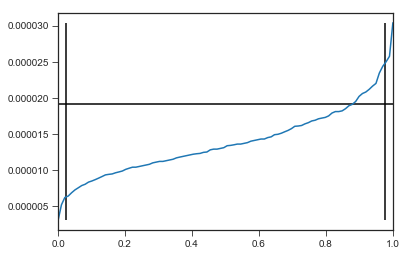

In [331]:
condition_ref='Modality == "Tomosynthesis Reconstruction" and \
               BodyPartThicknessStrata == "(45.0, 55.0]"' 
condition_recon = 'WindowSize == 6.3 and SlidingDistance == 6.3 and AutoTimed'

quantiles=np.linspace(0, 1, num = 100)
df_ref_tomo_merged.query(condition_ref)['EdgeEnhance'].quantile(quantiles).plot()
plt.vlines([0.025, 0.975], df_ref_tomo_merged.query(condition_ref)['EdgeEnhance'].min(), 
                           df_ref_tomo_merged.query(condition_ref)['EdgeEnhance'].max())
m=df_recon_merged.query(condition_recon)['EdgeEnhance'].mean()
plt.hlines(m, xmin=0, xmax=1)

In [332]:
condition_ref='Modality == "Tomosynthesis Reconstruction" and \
               BodyPartThicknessStrata == "(45.0, 55.0]"'
condition_recon='WindowSize == 6.3 and SlidingDistance == 6.3 and AutoTimed'
quantiles=np.linspace(0,1, num=1000)
percentile_all_features=np.zeros(feature_cols.shape)

for i, feature in enumerate(feature_cols): 
    m=df_recon_merged.query(condition_recon)[feature].mean()
    q=df_ref_tomo_merged.query(condition_ref)[feature].quantile(quantiles).values
    percentile_all_features[i]=quantiles[np.abs(m-q).argmin()]

In [321]:
feature_cols

Index([u'EdgeEnhance', u'FD center', u'LBP', u'cooccurrence clusterShade',
       u'cooccurrence correlation', u'cooccurrence energy',
       u'cooccurrence entropy', u'cooccurrence haralickCorrelation',
       u'cooccurrence inertia', u'cooccurrence inverseDifferenceMoment',
       u'graylevel 5th', u'graylevel 5thmean', u'graylevel 95th',
       u'graylevel 95thmean', u'graylevel entropy', u'graylevel kurtosis',
       u'graylevel max', u'graylevel mean', u'graylevel min',
       u'graylevel sigma', u'graylevel skewness', u'graylevel sum',
       u'runlength GreyLevelNonuniformity',
       u'runlength HighGreyLevelRunEmphasis', u'runlength LongRunEmphasis',
       u'runlength LowGreyLevelRunEmphasis',
       u'runlength RunLengthNonuniformity', u'runlength RunPercentage',
       u'runlength ShortRunEmphasis'],
      dtype='object')

In [333]:
percentile_all_features

array([ 0.87987988,  0.17917918,  0.58158158,  0.92892893,  0.95795796,
        0.98898899,  0.        ,  0.36436436,  0.64464464,  0.997998  ,
        0.84184184,  0.7977978 ,  0.87487487,  0.90590591,  0.36336336,
        0.97397397,  0.75075075,  0.8978979 ,  0.76376376,  0.68668669,
        0.93693694,  0.87587588,  0.47047047,  0.78278278,  0.995996  ,
        0.97897898,  0.        ,  0.03603604,  0.004004  ])

### Features for recon that are within [2.5%, 97.5%] percentile.

In [334]:
feature_cols[((percentile_all_features>0.025) & (percentile_all_features<0.975))]

Index([u'EdgeEnhance', u'FD center', u'LBP', u'cooccurrence clusterShade',
       u'cooccurrence correlation', u'cooccurrence haralickCorrelation',
       u'cooccurrence inertia', u'graylevel 5th', u'graylevel 5thmean',
       u'graylevel 95th', u'graylevel 95thmean', u'graylevel entropy',
       u'graylevel kurtosis', u'graylevel max', u'graylevel mean',
       u'graylevel min', u'graylevel sigma', u'graylevel skewness',
       u'graylevel sum', u'runlength GreyLevelNonuniformity',
       u'runlength HighGreyLevelRunEmphasis', u'runlength RunPercentage'],
      dtype='object')

### Features that are not

In [335]:
feature_cols[~((percentile_all_features>0.025) & (percentile_all_features<0.975))]

Index([u'cooccurrence energy', u'cooccurrence entropy',
       u'cooccurrence inverseDifferenceMoment', u'runlength LongRunEmphasis',
       u'runlength LowGreyLevelRunEmphasis',
       u'runlength RunLengthNonuniformity', u'runlength ShortRunEmphasis'],
      dtype='object')

In [349]:
condition_ref='Modality == "Tomosynthesis Reconstruction" and \
               BodyPartThicknessStrata == "(45.0, 55.0]"'
condition_recon='WindowSize == 6.3 and SlidingDistance == 6.3 and AutoTimed'
df_ref_recon_perc=df_ref_tomo_merged.query(condition_ref)[feature_cols].quantile([0.025, 0.25, 0.5, 0.75, 0.975])
recon_mean=df_recon_merged.query(condition_recon)[feature_cols].mean()
recon_std=df_recon_merged.query(condition_recon)[feature_cols].std()
recon_cov=recon_std/recon_mean

df_recon_stats=pd.concat([df_ref_recon_perc, recon_mean.to_frame(name='mean').T, 
                          recon_std.to_frame(name='std').T, recon_cov.to_frame(name='CoV').T])

df_recon_stats.loc['at_percentile']=np.round(percentile_all_features, decimals=3)
df_recon_stats.loc['realism']=((percentile_all_features>0.025) & (percentile_all_features<0.975))
df_recon_stats.to_csv('tomo_phantom_recon_vs_human_study_realism_stats_20180302.csv')

## C-View

In [351]:
condition_ref='Modality == "C-View" and \
               BodyPartThicknessStrata == "(45.0, 55.0]"'
df_ref_cview_merged.query(condition_ref)[feature_cols].quantile([0.025, 0.25, 0.5, 0.75, 0.975])

,EdgeEnhance,FD center,LBP,cooccurrence clusterShade,cooccurrence correlation,cooccurrence energy,cooccurrence entropy,cooccurrence haralickCorrelation,cooccurrence inertia,cooccurrence inverseDifferenceMoment,...,graylevel sigma,graylevel skewness,graylevel sum,runlength GreyLevelNonuniformity,runlength HighGreyLevelRunEmphasis,runlength LongRunEmphasis,runlength LowGreyLevelRunEmphasis,runlength RunLengthNonuniformity,runlength RunPercentage,runlength ShortRunEmphasis
0.025,0.000011,1.826234,4.329435,5310.8015,0.000690,0.000520,9.475943,10150770.0,300.410163,0.070918,...,0.509843,0.474529,-161.679650,56.475404,2116.71950,1.000000,0.001594,3732.620375,0.940446,0.999921
0.250,0.000016,1.864660,4.588288,8188.2450,0.000901,0.000614,9.600032,13383687.5,338.513400,0.076471,...,0.593189,0.713728,18.253875,62.438857,2393.07700,1.000005,0.001879,3757.024750,0.946629,0.999987
0.500,0.000019,1.885011,4.699776,9542.7030,0.001049,0.000672,9.657070,15886445.0,360.431250,0.079521,...,0.632582,0.814426,125.029600,65.874060,2609.15400,1.000015,0.002034,3768.225500,0.949429,0.999996
0.750,0.000022,1.905568,4.820696,10964.9600,0.001199,0.000734,9.711965,18296285.0,380.624825,0.082945,...,0.666295,0.930043,236.165300,69.357732,2827.94125,1.000051,0.002234,3779.468250,0.952252,0.999999
0.975,0.000027,1.945910,5.066959,13836.4825,0.001449,0.001007,9.820694,23452080.0,420.473012,0.089977,...,0.719244,1.124055,456.659350,76.258981,3381.18250,1.000485,0.002679,3800.368625,0.957547,1.000000


In [352]:
condition='WindowSize == 6.3 and SlidingDistance == 6.3 and AutoTimed'
df_cview_merged.query(condition)[feature_cols].mean().to_frame(name='mean').T

,EdgeEnhance,FD center,LBP,cooccurrence clusterShade,cooccurrence correlation,cooccurrence energy,cooccurrence entropy,cooccurrence haralickCorrelation,cooccurrence inertia,cooccurrence inverseDifferenceMoment,...,graylevel sigma,graylevel skewness,graylevel sum,runlength GreyLevelNonuniformity,runlength HighGreyLevelRunEmphasis,runlength LongRunEmphasis,runlength LowGreyLevelRunEmphasis,runlength RunLengthNonuniformity,runlength RunPercentage,runlength ShortRunEmphasis
mean,0.000028,1.860666,4.582632,19867.9575,0.000928,0.001279,8.776353,9.486405e+06,491.677062,0.107242,...,0.730218,1.348789,129.281527,72.017706,2262.904625,1.000202,0.002935,3249.590375,0.933645,0.99995


In [353]:
df_cview_merged.query(condition)[feature_cols].std()/df_cview_merged.query(condition)[feature_cols].mean()

EdgeEnhance                             0.035505
FD center                               0.010613
LBP                                     0.043361
cooccurrence clusterShade               0.023618
cooccurrence correlation                0.026489
cooccurrence energy                     0.077815
cooccurrence entropy                    0.003837
cooccurrence haralickCorrelation        0.052750
cooccurrence inertia                    0.012920
cooccurrence inverseDifferenceMoment    0.030211
graylevel 5th                          -0.018434
graylevel 5thmean                      -0.019061
graylevel 95th                          0.012650
graylevel 95thmean                      0.009411
graylevel entropy                       0.004462
graylevel kurtosis                      0.029220
graylevel max                           0.008106
graylevel mean                          0.158272
graylevel min                          -0.018836
graylevel sigma                         0.012558
graylevel skewness  

In [354]:
condition_ref='Modality == "C-View" and \
               BodyPartThicknessStrata == "(45.0, 55.0]"'
condition_cview='WindowSize == 6.3 and SlidingDistance == 6.3 and AutoTimed'
quantiles=np.linspace(0,1, num=1000)
percentile_all_features=np.zeros(feature_cols.shape)

for i, feature in enumerate(feature_cols): 
    m=df_cview_merged.query(condition_cview)[feature].mean()
    q=df_ref_cview_merged.query(condition_ref)[feature].quantile(quantiles).values
    percentile_all_features[i]=quantiles[np.abs(m-q).argmin()]

### Features for C-View that are within [2.5%, 97.5%] percentile.

In [355]:
feature_cols[((percentile_all_features>0.025) & (percentile_all_features<0.975))]

Index([u'FD center', u'LBP', u'cooccurrence correlation', u'graylevel 5th',
       u'graylevel 5thmean', u'graylevel max', u'graylevel mean',
       u'graylevel min', u'graylevel sum', u'runlength GreyLevelNonuniformity',
       u'runlength HighGreyLevelRunEmphasis', u'runlength LongRunEmphasis',
       u'runlength ShortRunEmphasis'],
      dtype='object')

### Features that are not

In [356]:
feature_cols[~((percentile_all_features>0.025) & (percentile_all_features<0.975))]

Index([u'EdgeEnhance', u'cooccurrence clusterShade', u'cooccurrence energy',
       u'cooccurrence entropy', u'cooccurrence haralickCorrelation',
       u'cooccurrence inertia', u'cooccurrence inverseDifferenceMoment',
       u'graylevel 95th', u'graylevel 95thmean', u'graylevel entropy',
       u'graylevel kurtosis', u'graylevel sigma', u'graylevel skewness',
       u'runlength LowGreyLevelRunEmphasis',
       u'runlength RunLengthNonuniformity', u'runlength RunPercentage'],
      dtype='object')

In [357]:
percentile_all_features

array([ 0.98298298,  0.20720721,  0.24124124,  1.        ,  0.3013013 ,
        0.995996  ,  0.        ,  0.01501502,  1.        ,  0.998999  ,
        0.71571572,  0.72372372,  1.        ,  0.997998  ,  0.01401401,
        0.98998999,  0.92092092,  0.55355355,  0.65765766,  0.98698699,
        0.996997  ,  0.51351351,  0.8978979 ,  0.11511512,  0.94494494,
        0.99399399,  0.        ,  0.00500501,  0.03403403])

In [358]:
condition_ref='Modality == "C-View" and \
               BodyPartThicknessStrata == "(45.0, 55.0]"'
condition_cview='WindowSize == 6.3 and SlidingDistance == 6.3 and AutoTimed'
df_ref_cview_perc=df_ref_cview_merged.query(condition_ref)[feature_cols].quantile([0.025, 0.25, 0.5, 0.75, 0.975])
cview_mean=df_cview_merged.query(condition_cview)[feature_cols].mean()
cview_std=df_cview_merged.query(condition_cview)[feature_cols].std()
cview_cov=cview_std/cview_mean

df_cview_stats=pd.concat([df_ref_cview_perc, cview_mean.to_frame(name='mean').T, 
                          cview_std.to_frame(name='std').T, cview_cov.to_frame(name='CoV').T])

df_cview_stats.loc['at_percentile']=np.round(percentile_all_features, decimals=3)
df_cview_stats.loc['realism']=((percentile_all_features>0.025) & (percentile_all_features<0.975))
df_cview_stats.to_csv('tomo_phantom_cview_vs_human_study_realism_stats_20180302.csv')